In [7]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

username = 'rppoland18'
token = ''

# Set the datastream and start/enddates
datastream = 'gucaossmpsS2.b1'
startdate = '2021-10-27'
enddate = '2023-06-16'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
sp = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
smps = act.io.read_arm_netcdf(sp)
smps

[DOWNLOADING] gucaossmpsS2.b1.20220730.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20221201.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220428.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20230613.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220729.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220205.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220510.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220501.000001.nc
[DOWNLOADING] gucaossmpsS2.b1.20220206.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220506.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220502.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220509.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220503.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220507.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220504.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220623.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220430.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220429.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20220720.000000.nc
[DOWNLOADING] gucaossmpsS2.b1.20230614.000000.nc
[DOWNLOADING] gucaos

/tmp/ipykernel_1457/1844302646.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,200])


Text(0, 0.5, 'Number Concentration (cm^-3)')

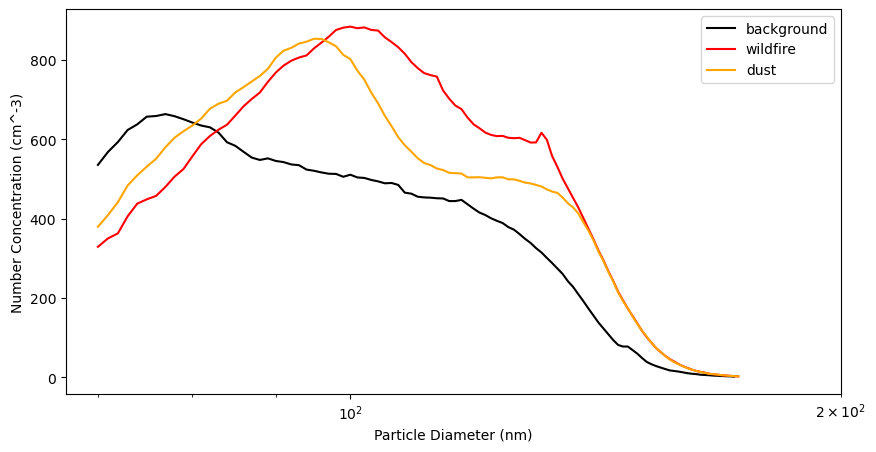

In [48]:
# Compiling total SMPS number concentrations for days of interest
wf = smps.sel(time=slice('2022-01-25T00:00:00','2022-01-29T00:00:00')) # slice days of interest (wildifre day)
wf_av = wf.mean(dim='time') # Calculate mean of variables over time
# print(wf_av.total_N_conc.values) # Average total concentration (cm^-3)

dust = smps.sel(time=slice('2023-04-03T00:00:00','2023-04-07T00:00:00')) # Slice for days of dust event
dust_av = dust.mean(dim='time') # Average over days
# print(dust_av.total_N_conc.values)

bkg = smps.sel(time=slice('2022-01-03T00:00:00','2022-01-07T00:00:00')) # Slice for background days
bkg_av = bkg.mean(dim='time') # Average over days
# print(bkg_av.total_N_conc.values)

# Now Plot!
plt.figure(figsize=[10,5])
plt.semilogx(bkg_av.dN_dlogDp,color='black')
plt.semilogx(wf_av.dN_dlogDp,color='red')
plt.semilogx(dust_av.dN_dlogDp,color='orange')
plt.legend(['background','wildfire','dust'])
plt.xlim([0,200])
plt.xlabel('Particle Diameter (nm)')
plt.ylabel('Number Concentration (cm^-3)')